Baixar os datasets para a máquina do Colab

In [1]:
# Instalar Git LFS e langdetect
!apt-get install -y git-lfs
!git lfs install
!pip install langdetect

# Criar pasta para os datasets
import os
dataset_folder = '/content/datasets/'
os.makedirs(dataset_folder, exist_ok=True)

# Lista de arquivos que queremos
files_to_download = [
    "20230727_195816_hn_sharings.json",
    "20230727_195927_pr_sharings.json",
    "20230727_195941_issue_sharings.json",
    "20230727_195954_discussion_sharings.json",
    "20230727_200003_commit_sharings.json",
    "20230727_200102_file_sharings.json"
]

# Criar um repositório temporário só para pegar os arquivos do LFS
!rm -rf temp_repo
!git init temp_repo
os.chdir('temp_repo')
!git remote add origin https://github.com/NAIST-SE/DevGPT.git
!git config core.sparseCheckout true

# Especificar os arquivos que queremos no sparse-checkout
with open(".git/info/sparse-checkout", "w") as f:
    for file in files_to_download:
        f.write(f"snapshot_20230727/{file}\n")

# Puxar apenas os arquivos especificados
!git pull origin main

# Mover os arquivos para datasets
import shutil
for file in files_to_download:
    src = os.path.join("snapshot_20230727", file)
    dst = os.path.join(dataset_folder, file)
    shutil.move(src, dst)

os.chdir('/content')
print(f"✅ Arquivos baixados em {dataset_folder}")

# # Opcional: baixar para sua máquina
# from google.colab import files  # para baixar direto para sua máquina
# for filename in urls.keys():
#     print(f"Preparando download de {filename} para sua máquina...")
#     files.download(save_folder + filename)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Git LFS initialized.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=ca4b4110f5752728156ace7465ebb87494bde34d3dafde584ed272121a7853f8
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'mas

Replicação - Equipe

- snapshot_20230727
- pegaram 100 conversas para montar as categorias
- resultou em 22 categorias
- 95% de confiança e 5% de erro
- Qualquer conversa que não estiver disponível e não for em inglês, descarta (N/A)

Importando o dataset em json

In [2]:
import os
import json
import pandas as pd

# Pasta onde estão os arquivos JSON
dataset_folder = './datasets/'

# Lista todos os arquivos JSON na pasta
json_files = [f for f in os.listdir(dataset_folder) if f.endswith('.json')]

all_sources = []

for file in json_files:
    file_path = os.path.join(dataset_folder, file)
    print(file_path)

    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            print(f"❌ Erro ao ler {file}")
            continue

    # Pega os dados da chave "Sources", se existir
    sources = data.get("Sources", [])

    # Adiciona uma coluna extra para identificar o arquivo de origem
    for source in sources:
        source["dataset_origin"] = file

    all_sources.extend(sources)

# Cria o DataFrame final
df = pd.DataFrame(all_sources)
print("Arquivos importados!")


./datasets/20230727_195954_discussion_sharings.json
./datasets/20230727_200003_commit_sharings.json
./datasets/20230727_195927_pr_sharings.json
./datasets/20230727_195816_hn_sharings.json
./datasets/20230727_195941_issue_sharings.json
./datasets/20230727_200102_file_sharings.json
Arquivos importados!


In [3]:
print(f"✅ Total de registros: {len(df)}")
df.head()

✅ Total de registros: 1478


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,...,ID,Points,AttachedURL,StoryText,CommentsTotalCount,ObjectSha,FileName,FilePath,Content,CommitMessage
0,discussion,https://github.com/orgs/deep-foundation/discus...,FreePhoenix888,deep-foundation/Discussions,None,27.0,Should we worry about imports perfomance in ha...,My dialogue with chatgpt about it: https://cha...,2023-07-11T11:31:00Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,discussion,https://github.com/JushBJJ/Mr.-Ranedeer-AI-Tut...,JushBJJ,JushBJJ/Mr.-Ranedeer-AI-Tutor,None,74.0,v2.7 - Code Interpreter Exclusive,# Mr. Ranedeer v2.7 - Code Interpreter Exclusi...,2023-07-15T10:58:10Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,discussion,https://github.com/dtch1997/gpt-text-gym/discu...,dtch1997,dtch1997/gpt-text-gym,Python,7.0,GPT decomposing missions using functions,Message 1: Environment description\r\nMessage ...,2023-06-26T19:30:34Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,discussion,https://github.com/dave1010/pandora/discussions/6,dave1010,dave1010/pandora,PHP,6.0,Demo and examples thread. Share what you've do...,## Installing Python and running a new Docker ...,2023-07-02T14:56:52Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,discussion,https://github.com/sugi-01096/72/discussions/2,haruto0214,sugi-01096/72,Python,2.0,a,https://chat.openai.com/share/2859d61a-3454-45...,2023-06-13T09:24:10Z,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


percorre o JSON das fontes e conversas do ChatGPT, filtra apenas os primeiros prompts feitos pelos usuários e transforma em uma linha estruturada com metadados para análise em um DataFrame.


In [4]:
rows = []

# Converte DataFrame em lista de dicionários
records = df.to_dict(orient="records")

# iterar e pegar somente o primeiro prompt de cada conversa
for src in records:
    chat_sharings = src.get("ChatgptSharing", []) or []
    for share in chat_sharings:
        conversations = share.get("Conversations", []) or []

        # Pega apenas o primeiro item, se existir
        if not conversations:
            continue

        first_turn = conversations[0]
        prompt = first_turn.get("Prompt")  # ajuste a chave se necessário

        if prompt is None:
            continue

        rows.append({
            "source_type": src.get("Type"),
            "source_url": src.get("URL"),
            "source_title": src.get("Title"),
            "chat_url": share.get("URL"),
            "chat_title": share.get("Title"),
            "date_of_conversation": share.get("DateOfConversation"),
            "status": share.get("Status"),
            "prompt": prompt
        })

df = pd.DataFrame(rows)

print(df.columns)
print(f"Total de prompts extraídos: {len(df)}")


Index(['source_type', 'source_url', 'source_title', 'chat_url', 'chat_title',
       'date_of_conversation', 'status', 'prompt'],
      dtype='object')
Total de prompts extraídos: 1745


Tratamentos:
*   Limpeza de texto
*   Remover prompts que não estão em inglês
*   Remover duplicatas



In [5]:
import re
from langdetect import detect, LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

if not df.empty:
    df["prompt"] = (
        df["prompt"]
        .astype(str)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )
    df = df[df["prompt"].str.len() > 0].reset_index(drop=True)

print(f"Limpeza no texto: {len(df)}")
print(f"\nAntes dos filtros: {len(df)}")

# Classificando as conversas por idioma.
df["lang"] = df["prompt"].apply(detect_language)

# Manter somente conversas em Inglês no Dataset
df_lang = df[df["lang"] == "en"]

print(f"\nApós filtro de idioma (inglês): {len(df_lang)}")

# Realizar uma última verificação para garantir
# que os dados estejam filtrados de maneira adequada.
# Removendo NAN e prompt com menos de 5 caracteres
df = df_lang[
    df_lang["prompt"].notna() & (df_lang["prompt"].str.len() > 5)
].reset_index(drop=True)

# Remover duplicatas antes da amostragem
df = df.drop_duplicates(subset=["prompt"]).reset_index(drop=True)

print(f"\nApós remoção de duplicatas: {len(df)}")

print(f"\nDataset final após todos os filtros: {len(df)}")

Limpeza no texto: 1744

Antes dos filtros: 1744

Após filtro de idioma (inglês): 1553

Após remoção de duplicatas: 1279

Dataset final após todos os filtros: 1279


Selecionar aleatoriamente 100 conversas para a fase exploratória.

In [6]:
# Selecionar aleatoriamente 100 conversas para fase exploratória
trial_sample = df.sample(n=100, random_state=42)

# Gerar .csv
# trial_sample.to_csv("trial_phase.csv", index=False)

Amostra estatística de 321 conversas

In [7]:
# Retirar do dataset principal os 100 selecionados
remaining = df.drop(trial_sample.index)
# Do dataset restante, selecionar 321 para analise manual
coding_sample = remaining.sample(n=321, random_state=42)

# Gerar .csv
# coding_sample.to_csv("coding_phase.csv", index=False)


## Fase manual
Aqui será gerado o csv com 321 prompts para a classificação manual de categorias por dois avaliadores.

In [8]:
# Criar as colunas para o preenchimento das categorias pelos 2 anotadores
coding_sample["annotator_A"] = ""
coding_sample["annotator_B"] = ""

# Gerar o .csv
coding_sample[[
    "chat_url",
    "prompt",
    "annotator_A",
    "annotator_B"
]].to_csv("annotation_sheet.csv", index=False)


## Cohen's Kappa

Aqui será feito o upload do csv preenchido pelas categorias definidas pelos anotadores e será calculada a concordância utilizando o Cohen's Kappa

é uma métrica estatística robusta que mede a concordância entre dois avaliadores (ou classificadores) que classificam itens em categorias nominais, corrigindo a concordância que ocorre por acaso

In [9]:
from sklearn.metrics import cohen_kappa_score

annotated = pd.read_csv("annotation_sheet_filled.csv")

kappa = cohen_kappa_score(
    annotated["annotator_A"],
    annotated["annotator_B"]
)

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.7667298578199052


## Consolidação dos rótulos

In [10]:
def resolve_label(row):
    if row["annotator_A"] == row["annotator_B"]:
        return row["annotator_A"]
    return row["annotator_B"]

annotated["label"] = annotated.apply(resolve_label, axis=1)
final_dataset = annotated[["prompt", "label"]]


## Pré-processamento textual

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download("stopwords")

stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)

final_dataset["clean_text"] = final_dataset["prompt"].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-2080395111.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["clean_text"] = final_dataset["prompt"].apply(preprocess)


## Classificação automática

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_dataset["clean_text"])
y = final_dataset["label"]


## Treinamento dos modelos

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\nModelo: {name}")
    print(classification_report(y_test, preds, zero_division=0))



Modelo: SVM
              precision    recall  f1-score   support

Analyze Code       0.00      0.00      0.00         1
   Debugging       0.00      0.00      0.00         4
General Info       0.70      1.00      0.83        31
  Write Code       0.95      0.69      0.80        29

    accuracy                           0.78        65
   macro avg       0.41      0.42      0.41        65
weighted avg       0.76      0.78      0.75        65


Modelo: Naive Bayes
              precision    recall  f1-score   support

Analyze Code       0.00      0.00      0.00         1
   Debugging       0.00      0.00      0.00         4
General Info       0.67      0.94      0.78        31
  Write Code       0.82      0.62      0.71        29

    accuracy                           0.72        65
   macro avg       0.37      0.39      0.37        65
weighted avg       0.69      0.72      0.69        65


Modelo: Random Forest
              precision    recall  f1-score   support

Analyze Code      

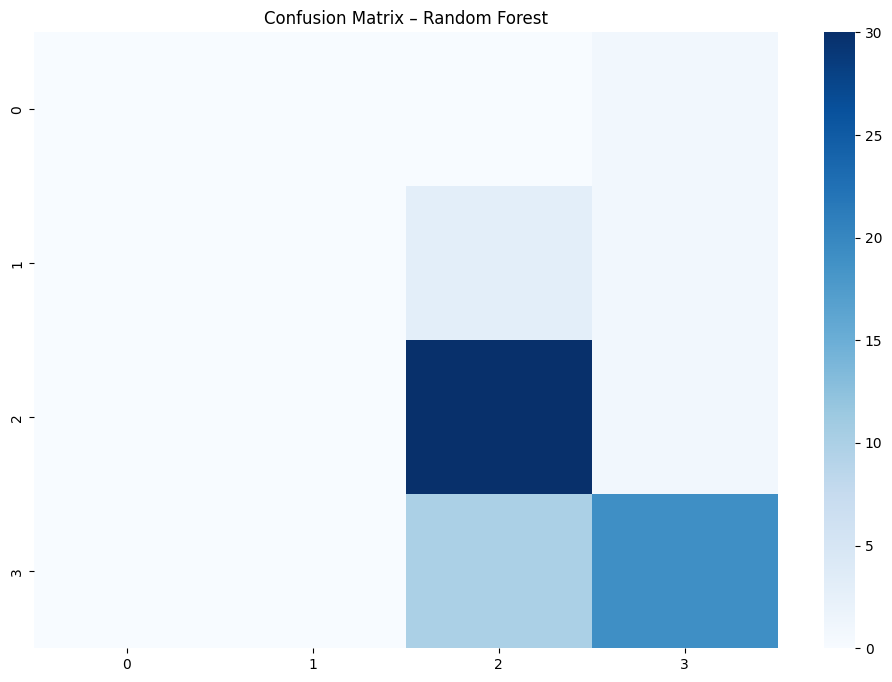

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

rf = models["Random Forest"]
cm = confusion_matrix(y_test, rf.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()


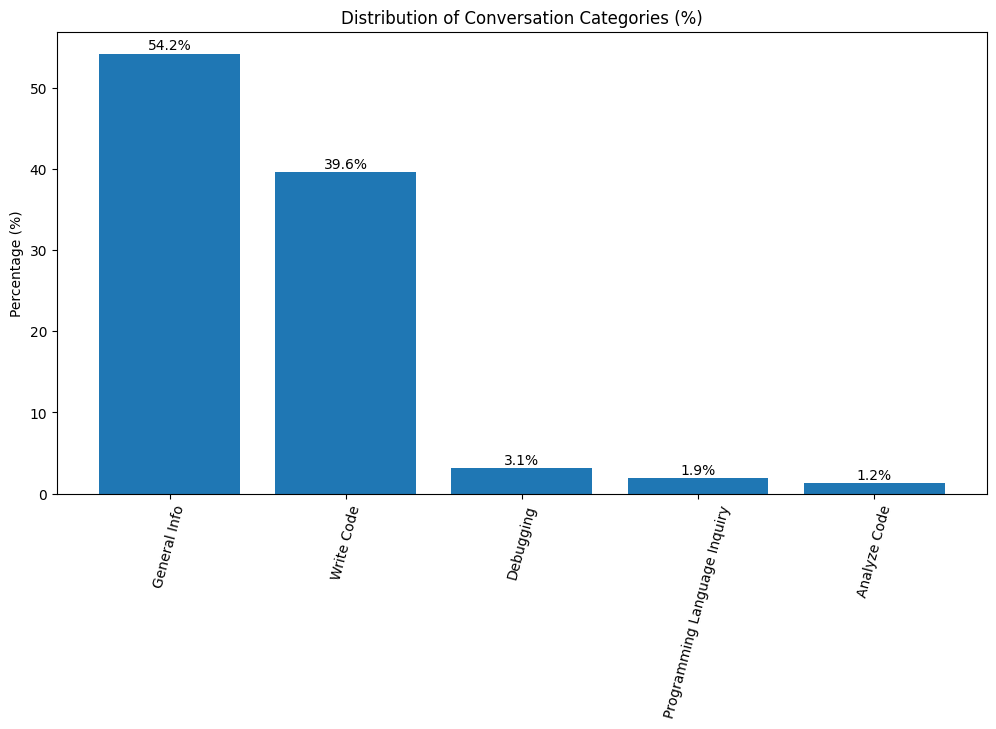

In [16]:
import matplotlib.pyplot as plt

# Contagem absoluta
category_counts = final_dataset["label"].value_counts()

# Percentual
category_percent = final_dataset["label"].value_counts(normalize=True) * 100

# Ordenar do maior para o menor
category_percent = category_percent.sort_values(ascending=False)

plt.figure(figsize=(12,6))
bars = plt.bar(category_percent.index, category_percent.values)

plt.xticks(rotation=75)
plt.ylabel("Percentage (%)")
plt.title("Distribution of Conversation Categories (%)")

# Adicionar valores no topo das barras
for i, v in enumerate(category_percent.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()

In [18]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in models.items():
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="macro")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro F1": f1
    })

results_df = pd.DataFrame(results).sort_values(by="Macro F1", ascending=False)

results_df

,Model,Accuracy,Macro F1
3,Decision Tree,0.876923,0.528117
0,SVM,0.784615,0.406667
2,Random Forest,0.753846,0.388977
1,Naive Bayes,0.723077,0.372417


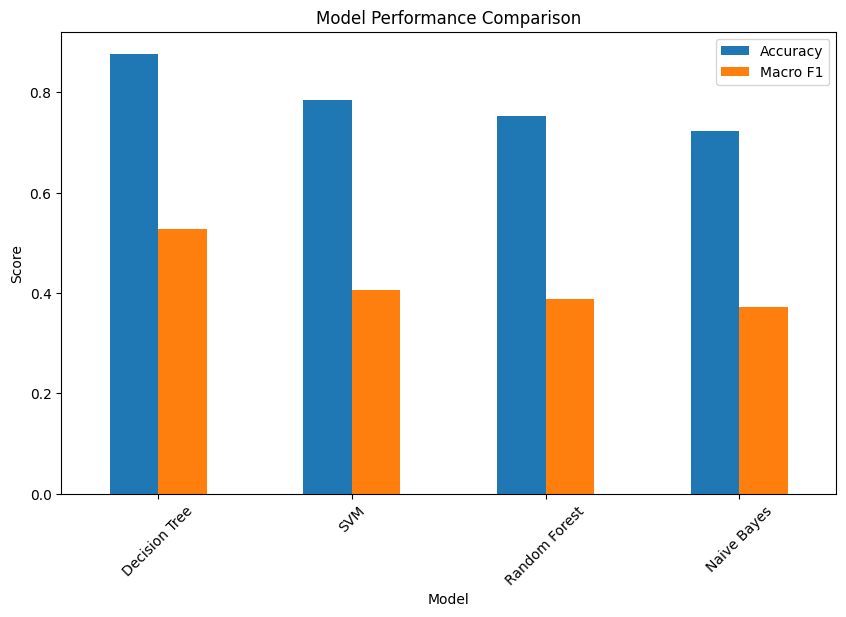

In [19]:
results_df.set_index("Model")[["Accuracy","Macro F1"]].plot(kind="bar", figsize=(10,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()